# Hands-on Machine Learning with Python (8th Sep 2018)

### Table of Contents

- [0) Importing Libraries](#0&#41;-Importing-Libraries)
- [1) Get the Data](#1&#41;-Get-the-Data)
    + [1.2) Loading Data](#1.2&#41;-Loading-data)
    + [1.3) Quick look at the data structure](#1.3&#41;-Quick-look-at-the-data-structure)
    + [1.4) Creating a test set](#1.4&#41;-Creating-a-test-set)
- [2) Data Exploration and Visualization](#2.1&#41;-Data-Exploration)
    + [2.1) Data Exploration](#2.1&#41;-Data-Exploration)
    + [2.2) Data Visualization](#2.2&#41;-Data-Visualization)
    + [2.3) Correalation between numerical variables](#2.3&#41;-Correlation-between-numerical-variables)
- [3) Preparing data for ML algorithms](#3&#41;-Preparing-data-for-ML-Algorithms)
    + [3.1) Data Cleaning \ Missing Value Treatment](#3.1&#41;-Data-Cleaning-%2F-Missing-Value-Treatment)
    + [3.2) Handling Text and Categorical Attributes](#3.2&#41;-Handling-Text-and-Categorical-Attributes)
    + [3.3) Feature Scaling](#3.3&#41;-Feature-Scaling)
    + [3.4) Transformation Pipelines](#3.4&#41;-Transformation-pipelines)
- [4) Train and Fine-Tuning the model](#4&#41;-Train-and-Fine---Tuning-the-Model)
    + [4.1) Training and Evaluation on the training set](#4.1&#41;-Training-and-Evaluation-on-the-training-set)
    + [4.2) Better Evaluation using Cross-Validation](#4.2&#41;-Better-Evaluation-using-Cross-Validation)
    + [4.3) Finalizing the model](#4.3&#41;-Finalizing-the-Model)
    + [4.4) Predicting the Test set](#4.4&#41;-Predicting-the-Test-set)
- [Pack up](#Pack-up)
    + [Dumping Everything](#Dumping-Everything)
    + [Loading into Python again](#Loading-into-Python-again)

<hr />

## 0) Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np

<hr />

## 1) Get the Data
### 1.2) Loading data

In [2]:
bankdata = pd.read_csv("bank.csv", na_values=["unknown"], sep=";")
# bankdata = pd.read_csv("bank.csv", sep=";")

### 1.3) Quick look at the data structure

In [3]:
bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Getting shape of the data (rows, columns)
print(bankdata.shape)

# Getting Column names of the data
print(bankdata.columns)

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [5]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
bankdata.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
bankdata.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,40858,41108,39457,32591,40198,40198,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,11,3,7,2,2,2,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [8]:
# Getting Categorical and Numerical variable list
cat_var = bankdata.dtypes.index[np.where(bankdata.dtypes == "object")].values.tolist()
num_var = bankdata.dtypes.index[np.where(bankdata.dtypes != "object")].values.tolist()

In [9]:
# Checking Value Counts for all the categorical variables

for var in cat_var:
    print("<================ %s ================>" % var)
    print(pd.DataFrame({"Freq": bankdata[var].value_counts(), 
                        "Freq_Perc": 100*bankdata[var].value_counts()/sum(bankdata[var].value_counts())}))
    print("\n")

<================ job ================>
                Freq  Freq_Perc
admin.         10422  25.507856
blue-collar     9254  22.649175
technician      6743  16.503500
services        3969   9.714132
management      2924   7.156493
retired         1720   4.209702
entrepreneur    1456   3.563562
self-employed   1421   3.477899
housemaid       1060   2.594351
unemployed      1014   2.481766
student          875   2.141563


<================ marital ================>
           Freq  Freq_Perc
married   24928  60.640265
single    11568  28.140508
divorced   4612  11.219227


<================ education ================>
                      Freq  Freq_Perc
university.degree    12168  30.838634
high.school           9515  24.114859
basic.9y              6045  15.320475
professional.course   5243  13.287883
basic.4y              4176  10.583673
basic.6y              2292   5.808855
illiterate              18   0.045619


<================ default ================>
      Freq  Freq_Perc
no

In [10]:
# Few data transformation
bankdata["education"] = np.where(bankdata["education"] == "basic.4y", "basic", bankdata["education"])
bankdata["education"] = np.where(bankdata["education"] == "basic.6y", "basic", bankdata["education"])
bankdata["education"] = np.where(bankdata["education"] == "basic.9y", "basic", bankdata["education"])

bankdata["education"].unique()

array(['basic', 'high.school', 'professional.course', nan,
       'university.degree', 'illiterate'], dtype=object)

### 1.4) Creating a test set

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bankdata, test_size = 0.1, random_state = 42)

In [12]:
# Checking yes-no proportion in train and test set
print("Train Data: Total Rows = %d; No = %d | Yes = %d" % (train_set.shape[0], train_set["y"].value_counts()[0], train_set["y"].value_counts()[1]))
print("Test Data: Total Rows = %d; No = %d | Yes = %d" % (test_set.shape[0], test_set["y"].value_counts()[0], test_set["y"].value_counts()[1]))

Train Data: Total Rows = 37069; No = 32891 | Yes = 4178
Test Data: Total Rows = 4119; No = 3657 | Yes = 462


<hr />

## 2) Data Exploration and Visualization

### 2.1) Data Exploration

In [13]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

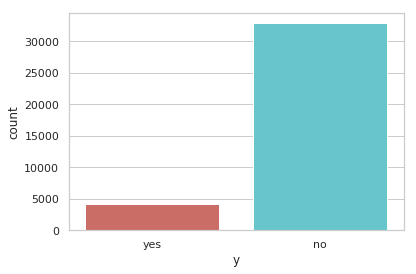

In [14]:
sns.countplot(data=train_set, palette="hls", x="y")

Let's get a sense of numbers across 2 classes

In [15]:
train_set.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.925086,220.621295,2.639415,984.270621,0.133015,0.247341,93.603389,-40.603113,3.809187,5176.119090
yes,40.849689,553.565582,2.040689,793.627812,0.489229,-1.229440,93.357558,-39.769076,2.126894,5095.064481


__Observations:__

- Average age of customer who bought term deposit is higher than that of customers who didn't.
- The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
- Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

Let's check for other variables to sense the data

In [16]:
train_set.groupby("job").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.215784,253.455746,2.630419,954.687507,0.189158,0.015007,93.532628,-40.225977,3.550985,5164.079859
blue-collar,39.614618,265.336414,2.564930,986.015002,0.122660,0.243591,93.654651,-41.410358,3.764758,5175.461330
entrepreneur,41.787072,260.796958,2.539924,980.881369,0.138403,0.166464,93.609656,-41.306692,3.796056,5176.660989
housemaid,45.427975,250.575157,2.626305,963.749478,0.135699,0.464405,93.690930,-39.493737,4.040725,5180.425365
management,42.339969,257.838821,2.493874,961.725115,0.189127,-0.020521,93.524115,-40.510758,3.602392,5166.241807
retired,61.982569,273.722402,2.499677,897.686249,0.322143,-0.689025,93.437030,-38.596578,2.774706,5122.440542
self-employed,39.848345,264.514242,2.678984,976.049269,0.141647,0.098999,93.563647,-40.530485,3.694329,5170.968514
services,37.932185,256.612840,2.605336,978.840467,0.157588,0.166759,93.635230,-41.294497,3.687401,5171.061757
student,25.875158,283.683480,2.093317,840.052963,0.533417,-1.421311,93.320127,-40.085498,1.877773,5085.920807


In [17]:
train_set.groupby("marital").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.986792,253.457253,2.630163,968.949808,0.172671,0.160807,93.610154,-40.724592,3.707926,5170.428194
married,42.311710,257.862798,2.571460,967.498057,0.155564,0.184024,93.597429,-40.277921,3.745991,5171.865992
single,33.158293,260.247966,2.544263,950.353909,0.210451,-0.169854,93.516076,-40.917351,3.315388,5155.200450


In [18]:
train_set.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic,42.165851,262.621586,2.564997,975.324406,0.141116,0.191289,93.640563,-40.962621,3.726795,5172.023401
high.school,38.051177,260.727720,2.575946,965.051880,0.185502,0.036163,93.586042,-40.949584,3.558753,5165.136445
illiterate,48.764706,266.000000,2.352941,940.588235,0.117647,-0.223529,93.309882,-40.176471,3.431412,5168.464706
professional.course,39.999575,254.198598,2.571580,960.637001,0.161427,0.175637,93.569847,-40.134388,3.712443,5170.229121
university.degree,38.859234,252.643448,2.571247,952.020642,0.193780,-0.033509,93.492699,-39.959634,3.525243,5162.947986


### 2.2) Data Visualization

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

#### i) Job Vs. Y

Text(0,0.5,'Frequency of Purchase')

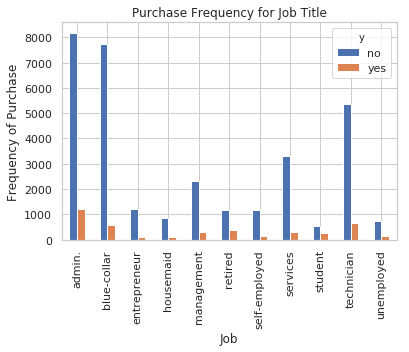

In [20]:
pd.crosstab(train_set.job, train_set.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Proportion of Customers')

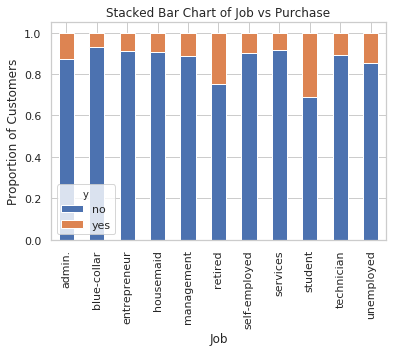

In [21]:
table=pd.crosstab(train_set.job, train_set.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job vs Purchase')
plt.xlabel('Job')
plt.ylabel('Proportion of Customers')
# plt.savefig('Job_vs_pur_stack')

#### ii) Marital Vs. Y

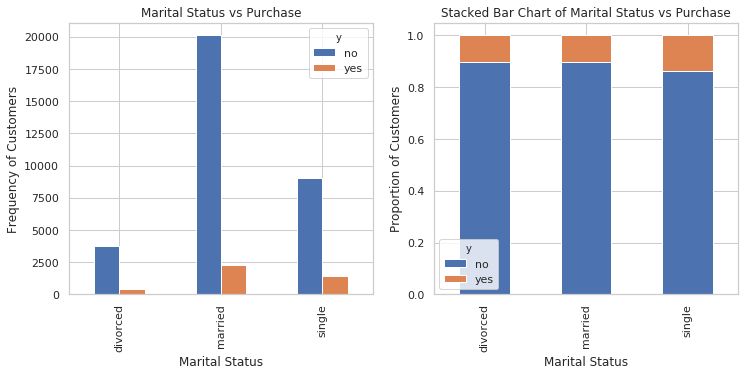

In [22]:
fig = plt.figure(figsize = (12,5))

ax = fig.add_subplot(1,2,1)
table=pd.crosstab(train_set.marital, train_set.y).plot(kind='bar', ax = ax)
plt.title('Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Customers')

ax = fig.add_subplot(1,2,2)
table=pd.crosstab(train_set.marital, train_set.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax = ax)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')


fig.savefig('mariral_vs_pur_stack')

#### iii) Education Vs. Y

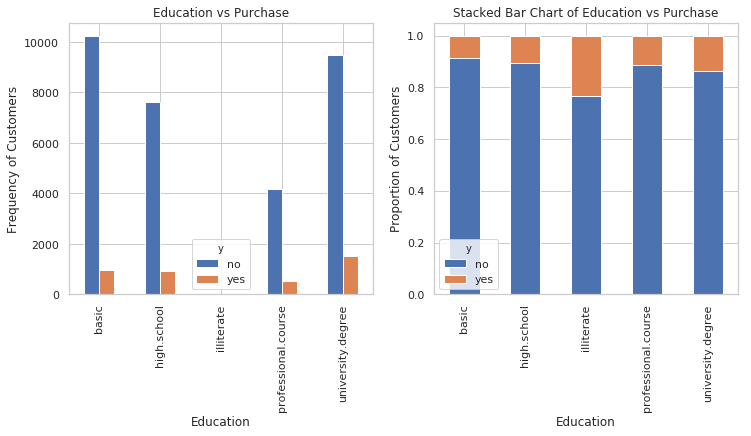

In [23]:
fig = plt.figure(figsize = (12,5))

ax = fig.add_subplot(1,2,1)
table=pd.crosstab(train_set.education, train_set.y).plot(kind='bar', ax = ax)
plt.title('Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Frequency of Customers')

ax = fig.add_subplot(1,2,2)
table=pd.crosstab(train_set.education, train_set.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax = ax)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')


fig.savefig('edu_vs_pur_stack')

#### iv) day of week Vs. Y

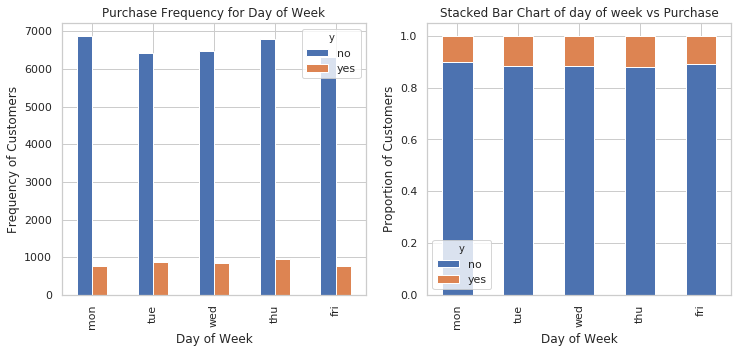

In [24]:
order = ["mon", "tue", "wed", "thu", "fri"]

fig = plt.figure(figsize = (12,5))

ax = fig.add_subplot(1,2,1)
table=pd.crosstab(train_set.day_of_week, train_set.y).loc[order].plot(kind='bar', ax = ax)
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Customers')

ax = fig.add_subplot(1,2,2)
table=pd.crosstab(train_set.day_of_week, train_set.y)
table.div(table.sum(1).astype(float), axis=0).loc[order].plot(kind='bar', stacked=True, ax = ax)
plt.title('Stacked Bar Chart of day of week vs Purchase')
plt.xlabel('Day of Week')
plt.ylabel('Proportion of Customers')

fig.savefig('pur_dayofweek_bar')

#### v) Month Vs. Y

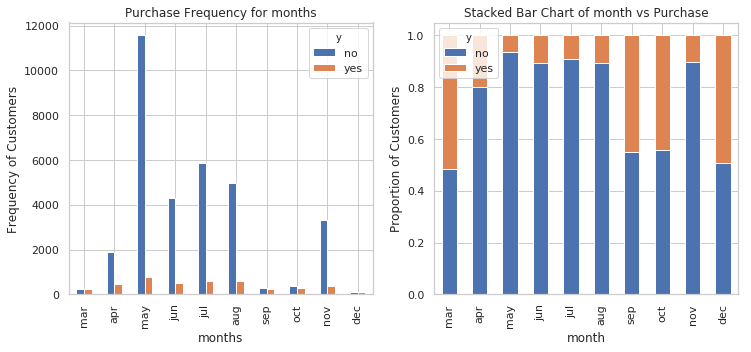

In [25]:
order = ["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

fig = plt.figure(figsize = (12,5))

ax = fig.add_subplot(1,2,1)
table=pd.crosstab(train_set.month, train_set.y).loc[order].plot(kind='bar', ax = ax)
plt.title('Purchase Frequency for months')
plt.xlabel('months')
plt.ylabel('Frequency of Customers')

ax = fig.add_subplot(1,2,2)
table=pd.crosstab(train_set.month, train_set.y)
table.div(table.sum(1).astype(float), axis=0).loc[order].plot(kind='bar', stacked=True, ax = ax)
plt.title('Stacked Bar Chart of month vs Purchase')
plt.xlabel('month')
plt.ylabel('Proportion of Customers')

fig.savefig('pur_fre_month_bar')

#### vi) poutcome Vs. Y

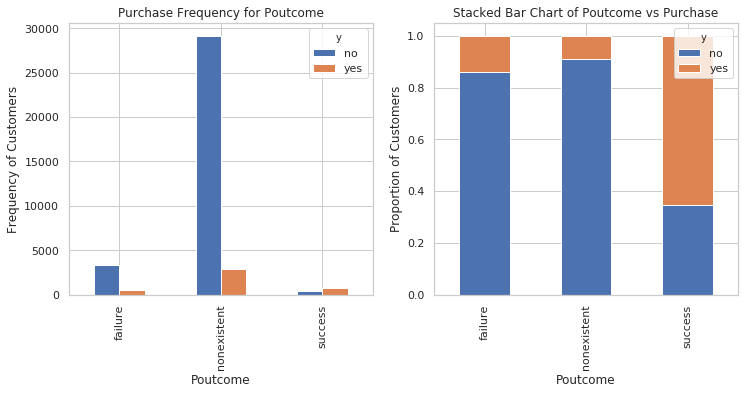

In [26]:
fig = plt.figure(figsize = (12,5))

ax = fig.add_subplot(1,2,1)
table=pd.crosstab(train_set.poutcome, train_set.y).plot(kind='bar', ax = ax)
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Customers')

ax = fig.add_subplot(1,2,2)
table=pd.crosstab(train_set.poutcome, train_set.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax = ax)
plt.title('Stacked Bar Chart of Poutcome vs Purchase')
plt.xlabel('Poutcome')
plt.ylabel('Proportion of Customers')

fig.savefig('pur_fre_pout_bar')

#### vii) Histogram

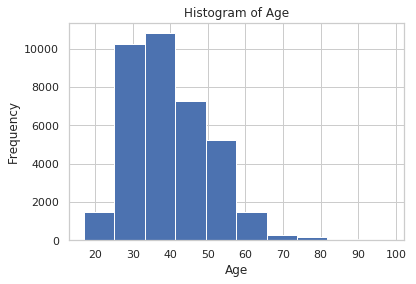

In [27]:
train_set.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

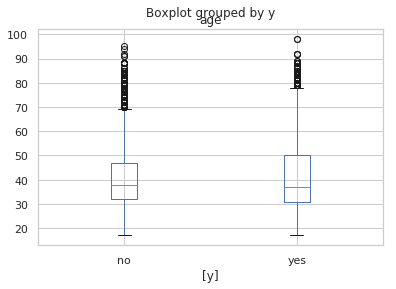

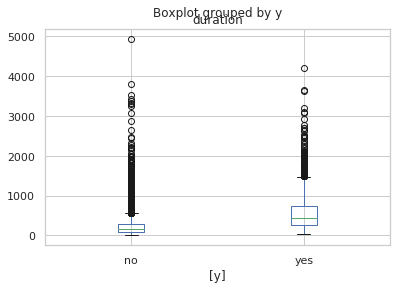

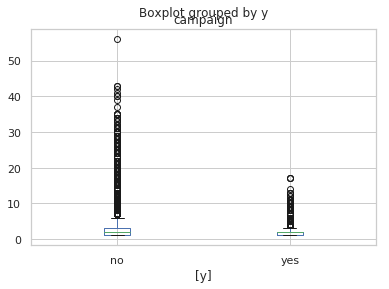

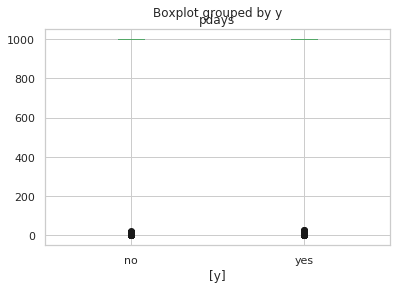

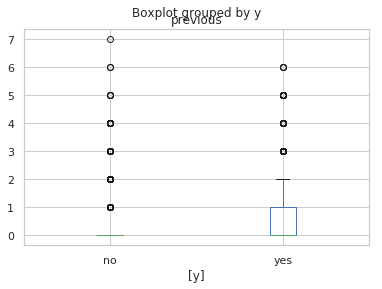

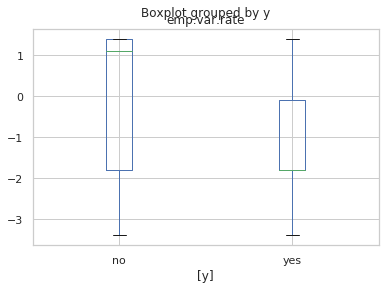

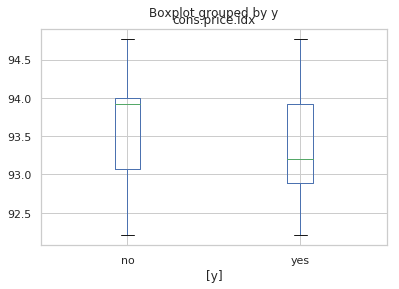

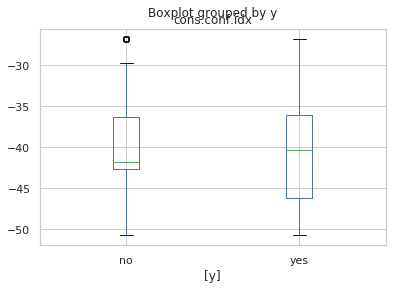

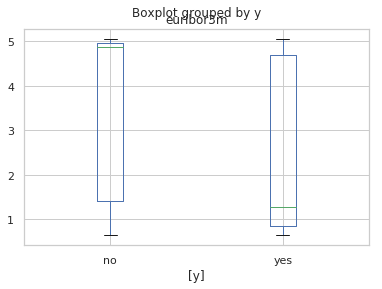

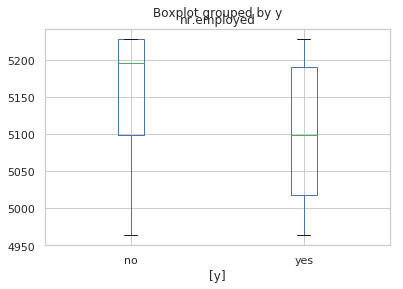

In [28]:
for x in num_var:
    train_set[[x, "y"]].boxplot(by="y")

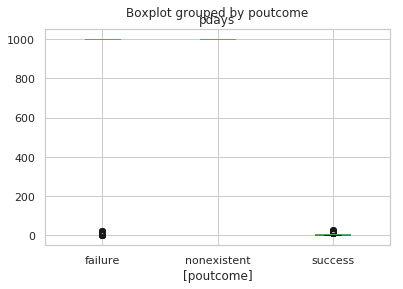

In [29]:
train_set[["pdays", "poutcome"]].boxplot(by="poutcome")

### 2.3) Correlation between numerical variables

In [30]:
train_set.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000937,0.006050,-0.035538,0.023071,0.000330,0.004263,0.127514,0.010965,-0.018315
duration,-0.000937,1.000000,-0.071551,-0.049429,0.020865,-0.028542,0.005049,-0.008468,-0.033517,-0.045201
campaign,0.006050,-0.071551,1.000000,0.051706,-0.079079,0.151471,0.128425,-0.013894,0.135762,0.144512
pdays,-0.035538,-0.049429,0.051706,1.000000,-0.584095,0.270969,0.079165,-0.093024,0.295974,0.371282
previous,0.023071,0.020865,-0.079079,-0.584095,1.000000,-0.421796,-0.205320,-0.053203,-0.455195,-0.500423
emp.var.rate,0.000330,-0.028542,0.151471,0.270969,-0.421796,1.000000,0.774298,0.195376,0.972212,0.906816
cons.price.idx,0.004263,0.005049,0.128425,0.079165,-0.205320,0.774298,1.000000,0.057305,0.686929,0.520290
cons.conf.idx,0.127514,-0.008468,-0.013894,-0.093024,-0.053203,0.195376,0.057305,1.000000,0.277259,0.100799
euribor3m,0.010965,-0.033517,0.135762,0.295974,-0.455195,0.972212,0.686929,0.277259,1.000000,0.945178
nr.employed,-0.018315,-0.045201,0.144512,0.371282,-0.500423,0.906816,0.520290,0.100799,0.945178,1.000000


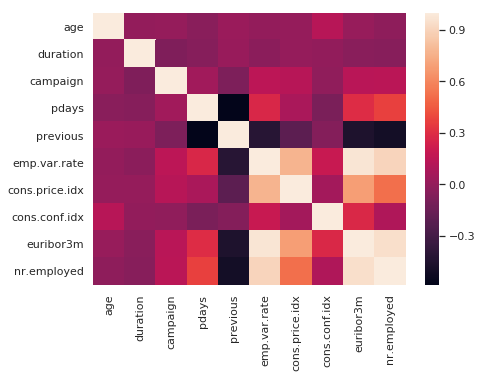

In [31]:
plt.subplots(figsize=(7, 5))
sns.heatmap(train_set.corr())

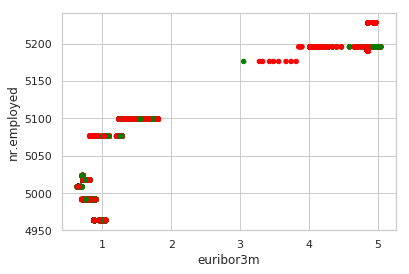

In [32]:
colors = np.where(train_set["y"]=="yes", "green", "red")
train_set.plot.scatter("euribor3m", "nr.employed", c=colors)

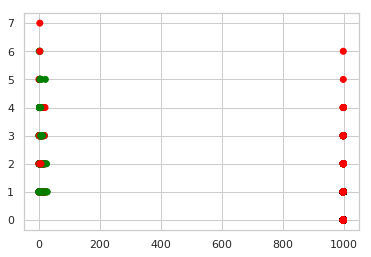

In [33]:
colors = np.where(train_set["y"]=="yes", "green", "red")
plt.scatter(train_set["pdays"], train_set["previous"], c=colors)

__Observation:__

- `euribor3m` and `nr.employed` are highly positive correlated (Remove one of the variable)

<hr />

## 3) Preparing data for ML Algorithms

### 3.1) Data Cleaning / Missing Value Treatment

#### Numerical Variables

In [34]:
train_set["pdays"] = np.where(train_set["pdays"] == 999, 0, train_set["pdays"])

/home/fractaluser/anaconda3/envs/myenv/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
train_set.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000937,0.006050,0.020408,0.023071,0.000330,0.004263,0.127514,0.010965,-0.018315
duration,-0.000937,1.000000,-0.071551,0.048547,0.020865,-0.028542,0.005049,-0.008468,-0.033517,-0.045201
campaign,0.006050,-0.071551,1.000000,-0.041196,-0.079079,0.151471,0.128425,-0.013894,0.135762,0.144512
pdays,0.020408,0.048547,-0.041196,1.000000,0.483360,-0.219297,-0.044467,0.066109,-0.250655,-0.320386
previous,0.023071,0.020865,-0.079079,0.483360,1.000000,-0.421796,-0.205320,-0.053203,-0.455195,-0.500423
emp.var.rate,0.000330,-0.028542,0.151471,-0.219297,-0.421796,1.000000,0.774298,0.195376,0.972212,0.906816
cons.price.idx,0.004263,0.005049,0.128425,-0.044467,-0.205320,0.774298,1.000000,0.057305,0.686929,0.520290
cons.conf.idx,0.127514,-0.008468,-0.013894,0.066109,-0.053203,0.195376,0.057305,1.000000,0.277259,0.100799
euribor3m,0.010965,-0.033517,0.135762,-0.250655,-0.455195,0.972212,0.686929,0.277259,1.000000,0.945178
nr.employed,-0.018315,-0.045201,0.144512,-0.320386,-0.500423,0.906816,0.520290,0.100799,0.945178,1.000000


#### Categorical Variables

It can be seen that the variables `job`, `marital`, `education`, `default`, `housing` and `loan` have missing values.

In [36]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 38651 to 15795
Data columns (total 21 columns):
age               37069 non-null int64
job               36774 non-null object
marital           36996 non-null object
education         35500 non-null object
default           29326 non-null object
housing           36172 non-null object
loan              36172 non-null object
contact           37069 non-null object
month             37069 non-null object
day_of_week       37069 non-null object
duration          37069 non-null int64
campaign          37069 non-null int64
pdays             37069 non-null int64
previous          37069 non-null int64
poutcome          37069 non-null object
emp.var.rate      37069 non-null float64
cons.price.idx    37069 non-null float64
cons.conf.idx     37069 non-null float64
euribor3m         37069 non-null float64
nr.employed       37069 non-null float64
y                 37069 non-null object
dtypes: float64(5), int64(5), object(11)
memory

In [37]:
train_set.marital.value_counts()

married     22383
single      10449
divorced     4164
Name: marital, dtype: int64

In [38]:
train_set["job"] = train_set["job"].fillna("admin.")
train_set["marital"] = train_set["marital"].fillna("married")
train_set["education"] = train_set["education"].fillna("university.degree")
train_set["default"] = train_set["default"].fillna("no")
train_set["housing"] = train_set["housing"].fillna("yes")
train_set["loan"] = train_set["loan"].fillna("no")

/home/fractaluser/anaconda3/envs/myenv/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/fractaluser/anaconda3/envs/myenv/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/fractaluser/anaconda3/envs/myenv/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [39]:
train_set.marital.value_counts()

married     22456
single      10449
divorced     4164
Name: marital, dtype: int64

### 3.2) Handling Text and Categorical Attributes

In [40]:
# train_set["y"] = np.where(train_set["y"]=="no", 0, 1)
cat_var.remove("y")

In [41]:
train_set_ohe = pd.get_dummies(train_set[cat_var])

In [42]:
train_set_ohe.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
38651,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
12733,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
35807,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1423,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
52,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### 3.3) Feature Scaling

it performs on the continuous variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55288f7c88>,
      dtype=object)

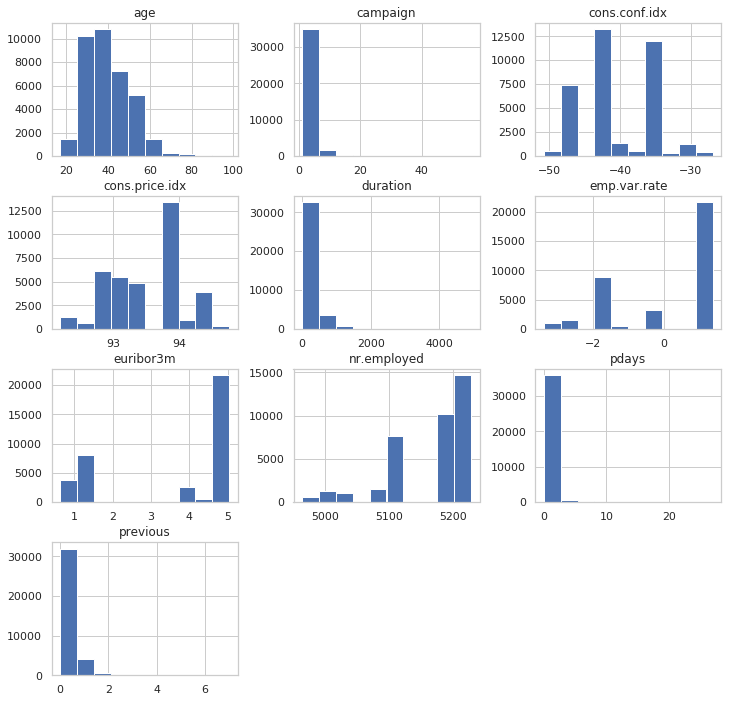

In [43]:
train_set[num_var].hist(figsize = [12, 12])

Here we can see that all the numerical variables are at a different scale. Hence need to do the feature scaling.

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(train_set[num_var]))

,0,1,2,3,4,5,6,7,8,9
0,-1.727586,0.383926,-0.565628,-0.163107,-0.350547,-2.214517,-1.600304,2.249856,-1.670788,-2.065579
1,1.147046,0.014814,-0.565628,-0.163107,-0.350547,0.839204,0.591156,-0.473546,0.773527,0.844514
2,0.667940,2.671650,0.154031,-0.163107,-0.350547,-1.196610,-1.178936,-1.230046,-1.368850,-0.938022
3,-0.194449,0.556947,-0.205798,-0.163107,-0.350547,0.648346,0.722402,0.888155,0.711872,0.331862
4,1.913614,-0.019790,-0.565628,-0.163107,-0.350547,0.648346,0.722402,0.888155,0.713024,0.331862
5,-1.344302,1.606609,0.154031,-0.163107,-0.350547,-1.196610,-1.178936,-1.230046,-1.365393,-0.938022
6,0.859582,-0.569613,-0.205798,-0.163107,-0.350547,0.648346,0.722402,0.888155,0.713024,0.331862
7,-0.769376,-0.212036,-0.565628,-0.163107,-0.350547,-0.115084,-0.648772,-0.322245,0.262998,0.398189
8,-1.440123,-0.669580,-0.565628,-0.163107,-0.350547,-1.896421,-2.373963,1.968870,-1.595304,-1.254457
9,-1.056839,-0.273554,-0.205798,-0.163107,-0.350547,0.839204,0.591156,-0.473546,0.774104,0.844514


### 3.4) Transformation pipelines

In [45]:
from sklearn.pipeline import Pipeline

Filter the data 

In [46]:
from sklearn.base import TransformerMixin

class DataFrameSelector(TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names]

#### Pipeline for Numerical Data

In [47]:
class num_var_trans1(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        X["pdays"] = np.where(X["pdays"] == 999, 0, X["pdays"])
        return X

In [48]:
class num_var_trans2(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        X = pd.DataFrame(X)
        X.columns = num_var
        return X

num_pipeline = Pipeline([("selector", DataFrameSelector(num_var)),
                         ("extra_trans1", num_var_trans1()),
                        ("standard_scaling", StandardScaler()),
                        ("extra_trans2", num_var_trans2())])

# num_pipeline = Pipeline([(), 
#                          (), 
#                          ()])

In [49]:
num_trans = num_pipeline.fit_transform(train_set)

/home/fractaluser/anaconda3/envs/myenv/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### Pipeline for Categorical Data

In [50]:
class cat_var_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, train_set):
        # Missing Value Imputation
        train_set["job"] = train_set["job"].fillna("admin.")
        train_set["marital"] = train_set["marital"].fillna("married")
        train_set["education"] = train_set["education"].fillna("university.degree")
        train_set["default"] = train_set["default"].fillna("no")
        train_set["housing"] = train_set["housing"].fillna("yes")
        train_set["loan"] = train_set["loan"].fillna("no")
        
        # One Hot Encoding
        XX = pd.get_dummies(train_set)
        
        return XX

cat_pipeline = Pipeline([("Selector", DataFrameSelector(cat_var)), 
                         ("Transformation", cat_var_trans())])

In [51]:
cat_trans = cat_pipeline.fit_transform(train_set)

/home/fractaluser/anaconda3/envs/myenv/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/fractaluser/anaconda3/envs/myenv/lib/python3.5/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/fractaluser/anaconda3/envs/myenv/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [52]:
final_data = pd.concat([num_trans.reset_index(drop=True), cat_trans.reset_index(drop=True)], axis=1)

In [53]:
final_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-1.727586,0.383926,-0.565628,-0.163107,-0.350547,-2.214517,-1.600304,2.249856,-1.670788,-2.065579,...,0,0,0,0,0,1,0,0,1,0
1,1.147046,0.014814,-0.565628,-0.163107,-0.350547,0.839204,0.591156,-0.473546,0.773527,0.844514,...,0,0,0,0,0,1,0,0,1,0
2,0.667940,2.671650,0.154031,-0.163107,-0.350547,-1.196610,-1.178936,-1.230046,-1.368850,-0.938022,...,0,0,0,1,0,0,0,0,1,0
3,-0.194449,0.556947,-0.205798,-0.163107,-0.350547,0.648346,0.722402,0.888155,0.711872,0.331862,...,0,0,0,0,1,0,0,0,1,0
4,1.913614,-0.019790,-0.565628,-0.163107,-0.350547,0.648346,0.722402,0.888155,0.713024,0.331862,...,0,0,0,1,0,0,0,0,1,0


In [54]:
def featureUnion(train_set):
    
    train_set["y"] = np.where(train_set["y"]=="no", 0, 1)
    y = train_set["y"].tolist()
    
    # Numerical Data Transformation
    num_trans = num_pipeline.fit_transform(train_set)
    
    # Categorical Data Transformation
    cat_trans = cat_pipeline.fit_transform(train_set)
    
    final_data = pd.concat([num_trans.reset_index(drop=True), cat_trans.reset_index(drop=True)], axis=1)
    
    return final_data, y
    

In [55]:
x_train, y_train = featureUnion(train_set)

/home/fractaluser/anaconda3/envs/myenv/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/fractaluser/anaconda3/envs/myenv/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/fractaluser/anaconda3/envs/myenv/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [56]:
x_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-1.727586,0.383926,-0.565628,-0.163107,-0.350547,-2.214517,-1.600304,2.249856,-1.670788,-2.065579,...,0,0,0,0,0,1,0,0,1,0
1,1.147046,0.014814,-0.565628,-0.163107,-0.350547,0.839204,0.591156,-0.473546,0.773527,0.844514,...,0,0,0,0,0,1,0,0,1,0
2,0.667940,2.671650,0.154031,-0.163107,-0.350547,-1.196610,-1.178936,-1.230046,-1.368850,-0.938022,...,0,0,0,1,0,0,0,0,1,0
3,-0.194449,0.556947,-0.205798,-0.163107,-0.350547,0.648346,0.722402,0.888155,0.711872,0.331862,...,0,0,0,0,1,0,0,0,1,0
4,1.913614,-0.019790,-0.565628,-0.163107,-0.350547,0.648346,0.722402,0.888155,0.713024,0.331862,...,0,0,0,1,0,0,0,0,1,0


In [57]:
from sklearn.pipeline import FeatureUnion

<hr />

## 4) Train and Fine - Tuning the Model

### 4.1) Training and Evaluation on the training set

In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(x_train, y_train )
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False  True  True False  True  True False  True
 False False False  True  True False  True False False False False False
  True False  True False False  True False  True  True  True  True False
  True  True  True False False  True  True  True  True False False False
  True False False False  True  True  True]
[23  1  8 24 27  1  1 15  1  1 20  1 10 12 17  1  1 11  1 25 22  6  5  7
  1  2  1  3  4  1 21  1  1  1  1 18  1  1  1 26 14  1  1  1  1  9 29 13
  1 16 19 28  1  1  1]


In [59]:
x_train.columns[rfe.support_].tolist()

['duration',
 'emp.var.rate',
 'cons.price.idx',
 'euribor3m',
 'nr.employed',
 'job_blue-collar',
 'job_retired',
 'job_self-employed',
 'job_student',
 'education_basic',
 'education_illiterate',
 'default_no',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'day_of_week_mon',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

In [60]:
cols = ['duration', 'emp.var.rate', 'cons.price.idx',  'euribor3m', 
        'job_blue-collar', 'job_retired', 'job_self-employed', 'job_student', 
        'education_basic', 'education_illiterate', 
        'default_no',
        'housing_yes', 
        'pdays',
        'loan_yes', 
        'contact_telephone',  
        'month_apr', 'month_aug', 'month_jun', 'month_mar', 'month_may', 'month_nov', 
        'day_of_week_mon', 
        'poutcome_failure', 'poutcome_success']

In [61]:
x_train_new = x_train[cols]

In [62]:
logreg.fit(x_train_new, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
y_pred = logreg.predict(x_train_new)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_train_new, y_train)))

Accuracy of logistic regression classifier on test set: 0.91


#### Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [65]:

def acc_res(y_train, y_pred):
    
    # Compute confusion matrix
    print("Confusion Matrix")
    cnf_matrix = confusion_matrix(y_train, y_pred)
    print(cnf_matrix)

    Accuracy_Test=(cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[0,1]+cnf_matrix[1,0]+cnf_matrix[1,1])
    TNR_Test= cnf_matrix[0,0]/(cnf_matrix[0,0] +cnf_matrix[0,1])
    TPR_Test= cnf_matrix[1,1]/(cnf_matrix[1,0] +cnf_matrix[1,1])

    print("\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("TNR: ",TNR_Test)
    print("TPR: ",TPR_Test)
    print("Accuracy: ",Accuracy_Test)
    print("\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(classification_report(y_train, y_pred))
    print("\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Only %0.2f%% of the actual term deposits are predicted correctly!!" % (TPR_Test*100))

In [66]:
acc_res(y_train, y_pred)

Confusion Matrix
[[32019   872]
 [ 2428  1750]]

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TNR:  0.9734881882581862
TPR:  0.41886069889899474
Accuracy:  0.9109768269983005

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     32891
          1       0.67      0.42      0.51      4178

avg / total       0.90      0.91      0.90     37069


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Only 41.89% of the actual term deposits are predicted correctly!!


#### Using matplotlib for plotting the ROC curve 

In [67]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.6961744435785904

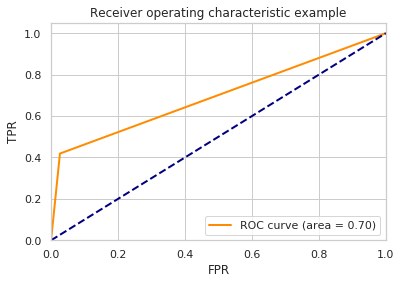

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
lw = 2
plt.plot(fpr,tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 4.2) Better Evaluation using Cross-Validation

In [69]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = LogisticRegression()

results = cross_val_score(modelCV, x_train_new, y_train, cv=kfold, scoring = "accuracy")
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

5-fold cross validation average accuracy: 0.910


In [70]:
print(results)

[0.91151875 0.90990019 0.90544915 0.91475587 0.91015783]


The average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well.`

### 4.3) Finalizing the Model

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, cv=5)

In [73]:
clf

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [74]:
best_model = clf.fit(x_train_new, y_train)

In [75]:
best_model.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 10


### 4.4) Predicting the Test-set

In [77]:
x_test, y_test = featureUnion(test_set)

/home/fractaluser/anaconda3/envs/myenv/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/fractaluser/anaconda3/envs/myenv/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/fractaluser/anaconda3/envs/myenv/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [78]:
x_test.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.655124,0.442552,-0.569019,-0.172045,1.647647,-1.209975,-1.183410,-1.240011,-1.355140,-0.961092,...,0,0,0,1,0,0,0,1,0,0
1,1.460667,0.101129,-0.196753,-0.172045,-0.340244,0.645816,0.725627,0.871202,0.709131,0.330061,...,0,0,0,0,1,0,0,0,1,0
2,-0.678356,-0.823887,-0.569019,-0.172045,1.647647,-1.209975,-1.183410,-1.240011,-1.347024,-0.961092,...,0,0,1,0,0,0,0,1,0,0
3,-0.386671,0.379031,0.547780,-0.172045,-0.340244,0.837794,1.542300,-0.292120,0.771157,0.851299,...,0,0,1,0,0,0,0,0,1,0
4,-1.261726,-0.279993,-0.196753,-0.172045,-0.340244,0.837794,0.593850,-0.486006,0.768839,0.851299,...,0,0,1,0,0,0,0,0,1,0


In [79]:
x_test_filtered = x_test[cols]

In [80]:
y_pred = best_model.predict(x_test_filtered)

In [81]:
acc_res(y_test, y_pred)

Confusion Matrix
[[3545  112]
 [ 253  209]]

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TNR:  0.9693738036642057
TPR:  0.4523809523809524
Accuracy:  0.9113862588006798

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      3657
          1       0.65      0.45      0.53       462

avg / total       0.90      0.91      0.90      4119


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Only 45.24% of the actual term deposits are predicted correctly!!


<hr />

## Pack-up
### Dumping Everything

In [82]:
from sklearn.externals import joblib

In [83]:
complete_info = {"data": {"train": train_set, "test": test_set},
                "model": best_model}

In [84]:
joblib.dump(complete_info, "Final_model.pkl")

['Final_model.pkl']

### Loading into Python again

In [85]:
complete_info_loaded = joblib.load("Final_model.pkl")